In [2]:
# Read image and uniform the scale

# Shadow + Low Brightness (DONE)

# Shear ( DONE )

# Binarization ( Depend on if paper only in the background or not )  (DONE)

# edge detection (DONE)

# Hough Transform  (DONE)

# orientation rotation  (DONE)

# invertion 

# Color detection

In [3]:
from commonfunctions import *
import skimage
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
def paper_binary_transfer(gray_image): # gray-scale from 0-1
    return_image = np.copy(gray_image)
    thresh = threshold_otsu(return_image)
    for i in range(0,gray_image.shape[0]):
        for j in range(0,gray_image.shape[1]):
            if gray_image[i][j] > thresh :
                return_image[i][j] = 0
            else :
                return_image[i][j] = 1
                
    return return_image

In [5]:
def sobel_imp(image,threshold):
    output_x = np.copy(image)
    output_y = np.copy(image)
    output = np.copy(image)
    
    f1 = np.array([
        [ -1,0,1],
        [ -2,0,2],
        [ -1,0,1]
    ])
    f2 = np.array([
        [ -1,-2,-1],
        [ 0,0,0],
        [ 1,2,1]
    ])
    
    output_x = convolve2d(image,f2)
    output_y = convolve2d(image,f1)
    
    
    for x in range(0,image.shape[0]):
        for y in range(0,image.shape[1]):
            output[x][y] = np.sqrt(((output_x[x][y]**2)+(output_y[x][y]**2)))
            if output[x][y] > threshold:
                output[x][y] = 1
            else :
                output[x][y] = 0
        
    return output

In [6]:
def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 

In [7]:
def hough(temp_image):
    image = temp_image
    
    tested_angles = np.linspace(-np.pi/2 , np.pi/2, 360)
    h, theta, d = hough_line(image, theta=tested_angles)
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(np.log(1 + h),
                 extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
                 cmap=cm.gray, aspect=1/1.5)
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    ax[2].imshow(image, cmap=cm.gray)
    origin = np.array((0, image.shape[1]))
    _, angle, dist = hough_line_peaks(h, theta, d)
    list_of_angles = []

    
    for i in range(0,len(angle)):
        list_of_angles.append(float("{0:.1f}".format(np.rad2deg(angle[i]))))
    final_angle = most_frequent(list_of_angles)
    
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
        ax[2].plot(origin, (y0, y1), '-r')
    ax[2].set_xlim(origin)
    ax[2].set_ylim((image.shape[0], 0))
    ax[2].set_axis_off()
    ax[2].set_title('Detected lines')
    plt.tight_layout()
    plt.show()
    return final_angle

In [8]:
def make_it_white_background(rgb_image, binarized_image ):
    return_image_rgb = np.copy((rgb_image))
    for i in range (0,binarized_image.shape[0]):
        for j in range(0,binarized_image.shape[1]):
            if binarized_image[i][j] == 1:
                return_image_rgb[i][j] = rgb_image[i][j]
            else:
                return_image_rgb[i][j] = [255,255,255]
                
    return return_image_rgb

Enter name of the input image: case1
Enter Extension of the input image: .jpeg
Creation of the directory C:\Users\mahmo\Documents\Image processing\project\case1 failed


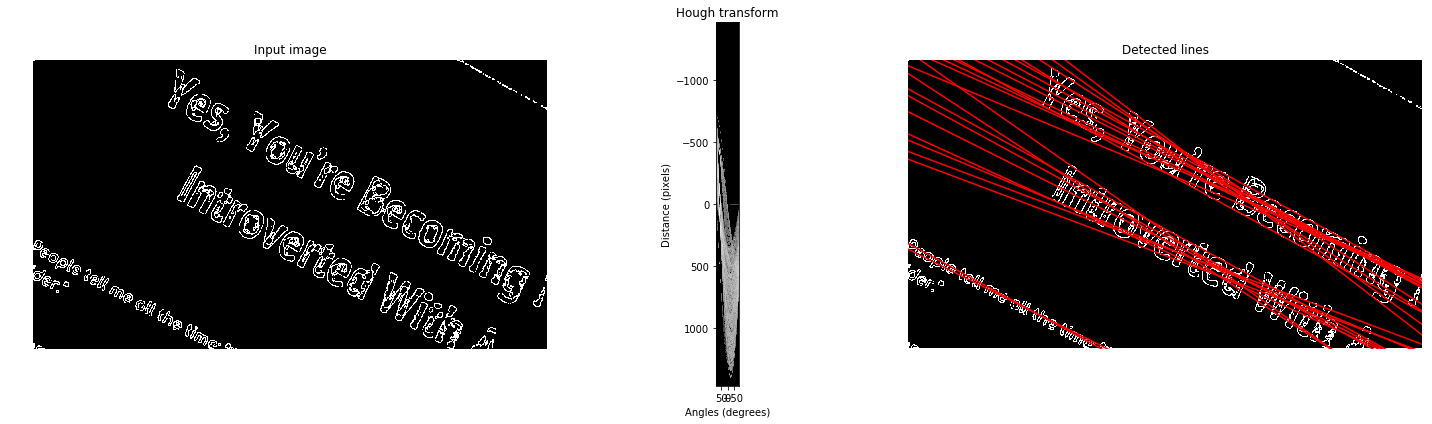

Rotation angle in degree:  28.6


In [11]:
input_name = input("Enter name of the input image: ")
extension = input("Enter Extension of the input image: ")
input_path  = "final_cases/" + input_name + extension

path = os.getcwd()
path = str(path+"\\"+input_name)
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

input_image = io.imread(input_path)
gray_scale_image = np.array((rgb2gray(input_image) * 255).astype(np.uint8))
gray_scale_image = gray_scale_image / 255

output_path = str(input_name + "/1_gray_scale.jpeg")
io.imsave(output_path,np.array((gray_scale_image*255).astype(np.uint8)))





img = cv2.imread(input_path, -1)
rgb_planes = cv2.split(img)
result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((3,3), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)
result_norm_gray = rgb2gray(result_norm)
io.imsave(str(input_name + "/2_shadow_removal.jpeg"),np.array((result_norm_gray*255).astype(np.uint8)))



my_final_img = paper_binary_transfer(result_norm_gray)
io.imsave(str(input_name + "/3_binarization.jpeg"),np.array((my_final_img*255).astype(np.uint8)))
white_background = make_it_white_background(input_image,my_final_img)


edged_sobel = sobel_imp(my_final_img,0.6) # return image from 0-1
io.imsave(str(input_name + "/4_sobel_edge.jpeg"),np.array((edged_sobel*255).astype(np.uint8)))


angle_of_rotation = hough(edged_sobel)

if angle_of_rotation > 0 :
    rotation_angle = -(90- angle_of_rotation)   
else:
    rotation_angle = 90 + angle_of_rotation
print("Rotation angle in degree: ",rotation_angle)
    
rotated_image = rotate(white_background, rotation_angle, resize=True,preserve_range=True,mode='constant',cval=255)
io.imsave(str(input_name + "/5_rotation.jpeg"),np.array((rotated_image).astype(np.uint8)))
